## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#https://stackoverflow.com/questions/43066374/how-to-find-out-number-of-unique-values-in-a-column-along-with-count-of-the-uniq
total_number_mice = mouse_study_results_df["Mouse ID"].nunique()
total_number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate_number_mice = mouse_study_results_df[mouse_study_results_df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_ID = duplicate_number_mice["Mouse ID"].unique()
print(mouse_ID)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_number_mice = mouse_study_results_df[mouse_study_results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_number_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_results_df = mouse_study_results_df[(mouse_study_results_df["Mouse ID"] !="g989")]
mouse_clean_results_df

# mouse_clean_results_df = mouse_study_results_df.drop(mouse_study_results_df.loc
#                                                    [mouse_study_results_df["Mouse ID"]=="g989"].index, inplace=True)
# mouse_clean_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mouse_clean_results_df = mouse_clean_results_df["Mouse ID"].nunique()
total_mouse_clean_results_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

by_drug_regimen_df = mouse_clean_results_df.groupby(['Drug Regimen'])  

mean_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].mean()
mean_drug_regimen

median_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].median()
median_drug_regimen

var_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].var()
var_drug_regimen

stdev_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].std()
stdev_drug_regimen

SEM_drug_regimen= by_drug_regimen_df.sem()['Tumor Volume (mm3)']
SEM_drug_regimen

Summary_DF = pd.DataFrame ({
    "Mean":mean_drug_regimen,
    "Median":median_drug_regimen,
    "Variance":var_drug_regimen,
    "Standard Deviation":stdev_drug_regimen,
    "SEM":SEM_drug_regimen})

Summary_DF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

by_drug_regimen_df2 = mouse_clean_results_df.groupby(['Drug Regimen'])

Summary_DF2=by_drug_regimen_df2.agg(['mean', 'median', 'var','std', 'sem' ])['Tumor Volume (mm3)']
Summary_DF2



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

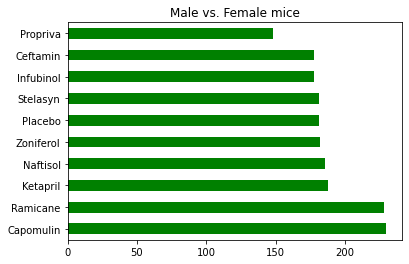

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_reg=mouse_clean_results_df['Drug Regimen'].unique()
drugs_reg

timepoints=mouse_clean_results_df['Drug Regimen'].value_counts()
timepoints

timepoints.plot(kind='barh', title='Male vs. Female mice', color='green')
plt.show()


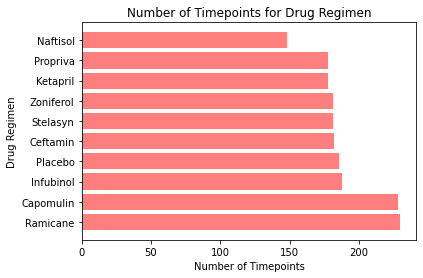

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs_reg=mouse_clean_results_df['Drug Regimen'].unique()
drugs_reg

timepoints=mouse_clean_results_df['Drug Regimen'].value_counts()
timepoints

plt.barh(drugs_reg, timepoints, color='r', alpha=.5, align="center")

plt.title("Number of Timepoints for Drug Regimen")
plt.xlabel("Number of Timepoints")
plt.ylabel("Drug Regimen")
plt.show()

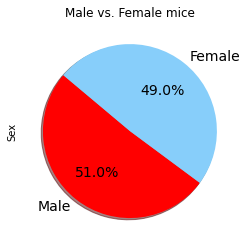

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=mouse_clean_results_df['Sex'].unique()
gender=mouse_clean_results_df['Sex'].value_counts()
gender

gender.plot(kind='pie', y='Sex', title="Male vs. Female mice", startangle=140, autopct='%1.1f%%', shadow=True,\
fontsize=14, colors=["red", "lightskyblue"], legend=False)
plt.show()


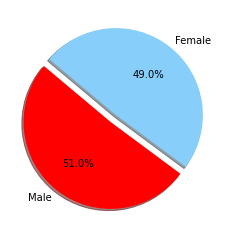

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=mouse_clean_results_df['Sex'].unique()
gender=mouse_clean_results_df['Sex'].value_counts()
gender
colors = ["red", "lightskyblue"]
labels = ["Male", "Female"]
explode = (0.1, 0)

plt.pie(gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
MaxTimeCap= mouse_clean_results_df.groupby(['Mouse ID']).agg({"Timepoint": ['max']})
MaxTimeCap.columns = MaxTimeCap.columns.droplevel(1)
MaxTimeCap

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Combine the data into a single dataset
FinalCap = pd.merge(MaxTimeCap, mouse_clean_results_df, how="left", on=["Timepoint", "Mouse ID"])


# Display the data table for preview
FinalCap

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,10,z435,Propriva,Female,12,26,48.710661,0
244,45,z578,Ramicane,Male,11,16,30.638696,0
245,45,z581,Infubinol,Female,24,25,62.754451,3
246,45,z795,Naftisol,Female,13,29,65.741070,3


In [49]:
# Put treatments into a list for for loop (and later for plot labels)

Drug_Regimen= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

TumorVol=[]

for DR in Drug_Regimen: 

    TumorVol.append(FinalCap["Tumor Volume (mm3)"][(FinalCap["Drug Regimen"]== DR)])

TumorVol              


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
lowerq=[0,0,0,0] 
upperq=[0,0,0,0] 
iqr=[0,0,0,0] 
lower_bound=[0,0,0,0]
upper_bound =[0,0,0,0]
OutlierUp=[]
OutlierLow=[]

for i in range(4):
    quartiles = TumorVol[i].quantile([.25,.5,.75])
    lowerq[i] = quartiles[0.25]
    upperq[i] = quartiles[0.75]
    iqr[i] = upperq[i]-lowerq[i]
    lower_bound[i] = lowerq[i] - (1.5*iqr[i])
    upper_bound[i] = upperq[i] + (1.5*iqr[i])

    OutlierUp.append(FinalCap["Tumor Volume (mm3)"][(FinalCap["Drug Regimen"]==Drug_Regimen[i])&
                                                     (FinalCap["Tumor Volume (mm3)"]>upper_bound[i])].values)
    
    OutlierLow.append(FinalCap["Tumor Volume (mm3)"][(FinalCap["Drug Regimen"]==Drug_Regimen[i])&
                                                     (FinalCap["Tumor Volume (mm3)"]<lower_bound[i])].values)
OutlierLow

for i in range(4):
    print(Drug_Regimen[i])
    print(iqr[i])
    print(lower_bound[i])
    print(upper_bound[i])


Capomulin
7.781863460000004
20.70456164999999
51.83201549
Ramicane
9.098536719999998
17.912664470000003
54.30681135
Infubinol
11.477135160000003
36.83290494999999
82.74144559000001
Ceftamin
15.577752179999997
25.355449580000002
87.66645829999999


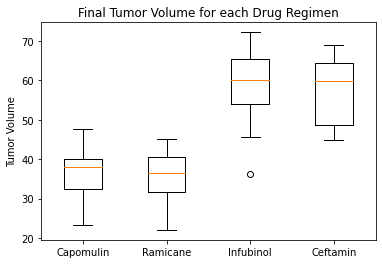

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for each Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(TumorVol)
plt.xticks((1,2,3,4),["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


plt.scatter(california_data['clean_results_df'],california_data['Latitude'],c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
clb.set_label("Data for Capomulin Regimen")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
